In [353]:
# Import seaborn
import seaborn as sns
import pandas  as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt

In [374]:
shapefile_path = './data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp'
gdf_states = gpd.read_file(shapefile_path)

gdf_states['NAME'] = gdf_states['NAME'].str.upper()
gdf_states = gdf_states[~gdf_states['NAME'].isin(['ALASKA', 'HAWAII', 'PUERTO RICO'])]

In [375]:
df_uv = pd.read_csv('./data/uv.csv')
df_uv['State'] = df_uv['State'].str.upper()
df_uv = df_uv[~df_uv['State'].isin(['ALASKA', 'HAWAII', 'PUERTO RICO'])]


uv_min_value = df_uv['Value'].min()
uv_max_value = df_uv['Value'].max()

In [379]:
def plot_map(df, gdf_states, min_value, max_value, column_name):
    fig, ax = plt.subplots(2, 3, figsize=(15, 7))
    ax = ax.flatten()  

    years = [2004, 2007, 2010, 2013, 2016, 2020]
    for i, year in enumerate(years):
        df_temp = df[df['Year'] == year]
        df_temp = df_temp[['State', column_name]]
        gdf_states_temp = gdf_states.merge(df_temp, how='left', left_on='NAME', right_on='State')
    
        gdf_states_temp.plot(column=column_name, cmap='coolwarm', linewidth=0.8, ax=ax[i], edgecolor='black', legend=True, vmin=min_value, vmax=max_value)
        ax[i].set_title(f'Overall Cancer by State in {year}')
        
    plt.tight_layout()
    plt.show()


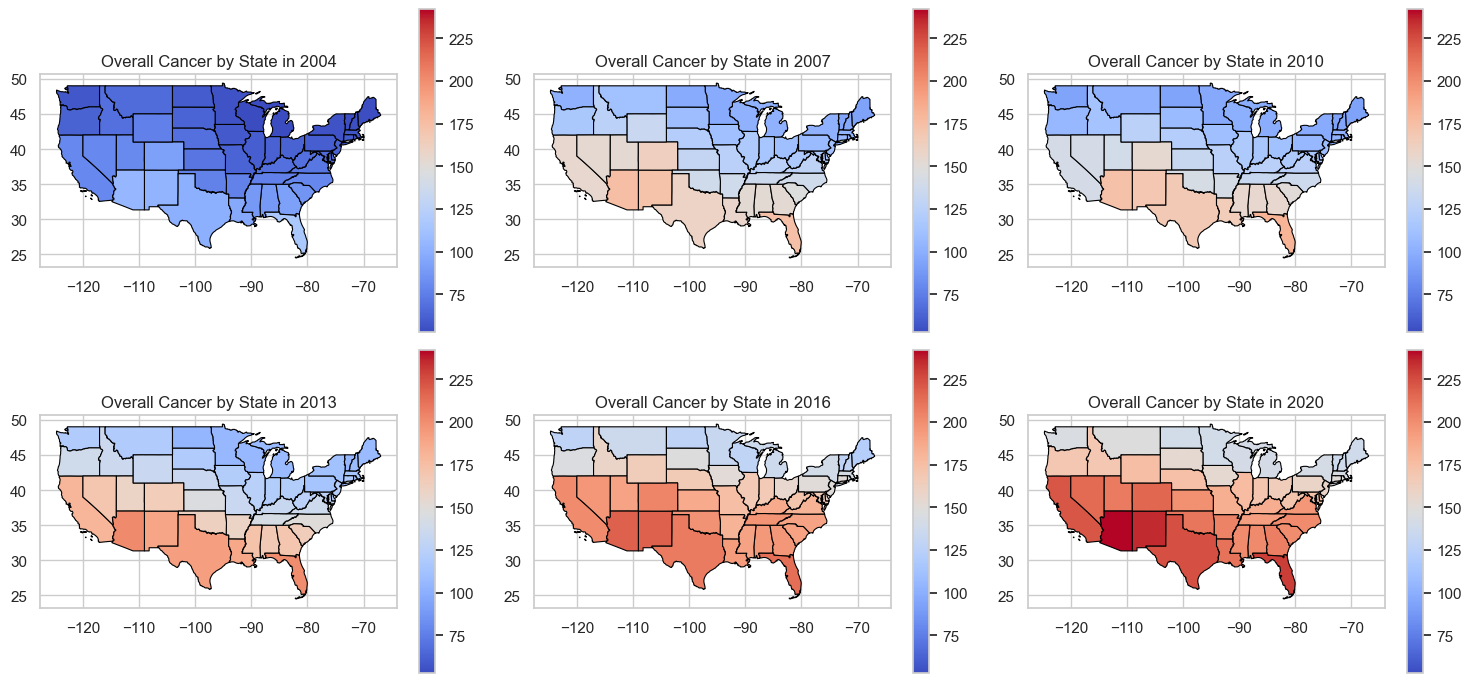

In [380]:
plot_map(df_uv, gdf_states, uv_min_value, uv_max_value, 'Value')

In [381]:
df_skin = pd.read_csv('./data/USCSTrendMap.csv')
df_skin = df_skin.rename(columns={'Area': 'State', 'Age-Adjusted Rate': 'RateValue'})
df_skin['State'] = df_skin['State'].str.upper()
df_skin = df_skin[(df_skin['State'] != 'ALASKA') & (df_skin['State'] != 'HAWAII') & (df_skin['State'] != 'PUERTO RICO')]


df_skin['RateValue'] = df_skin['RateValue'].replace('Data not presented', None)
df_skin['RateValue'] = df_skin['RateValue'].dropna()
df_skin['RateValue'] = df_skin['RateValue'].astype(float)

df_elevation = pd.read_csv('./data/elevation.csv')
df_elevation['State'] = df_elevation['State'].str.upper()
df_elevation = df_elevation[(df_elevation['State'] != 'ALASKA') & (df_elevation['State'] != 'HAWAII')]

df_skin = df_skin.merge(df_elevation, how='inner', on='State')

skin_min_value = df_skin['RateValue'].min()
skin_max_value = df_skin['RateValue'].max()

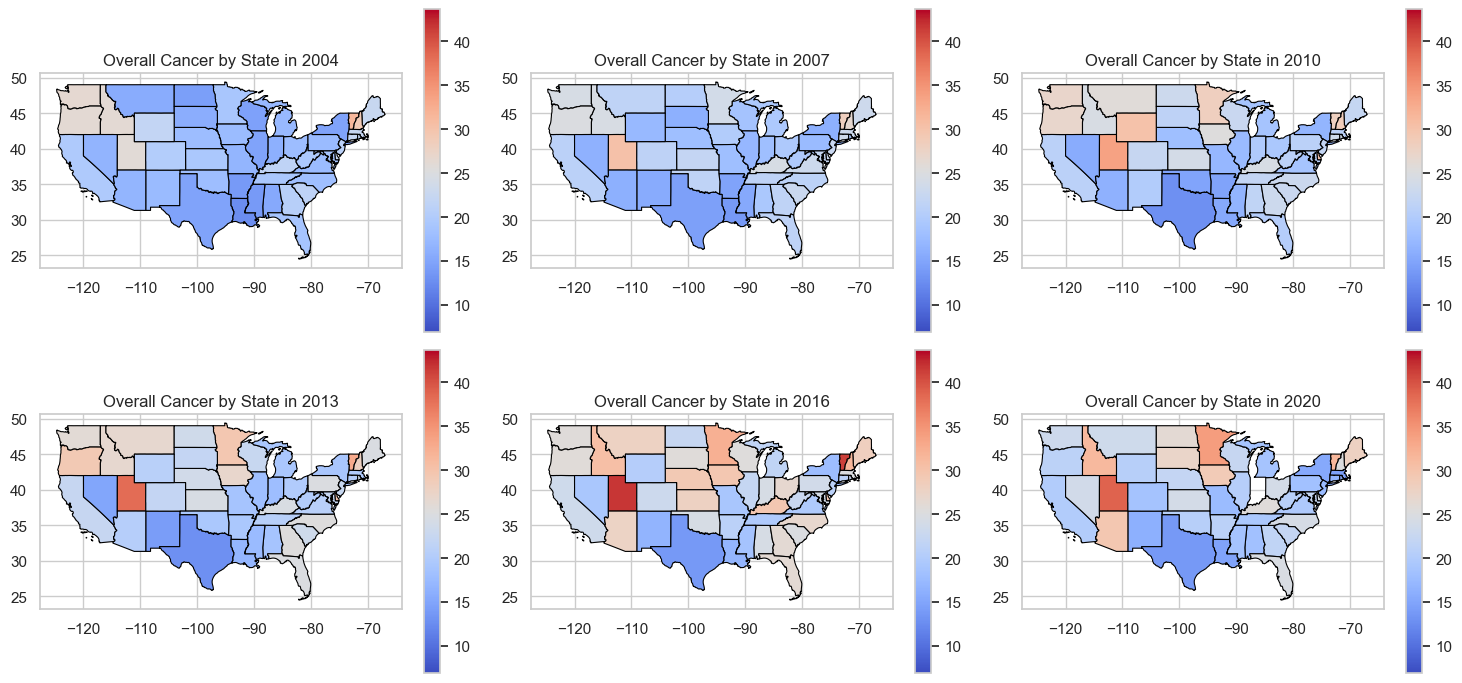

In [383]:
plot_map(df_skin, gdf_states, skin_min_value, skin_max_value, 'RateValue')

In [384]:
df_all = pd.read_csv('./data/USCSTrendMap_all.csv')
df_all = df_all.rename(columns={'Area': 'State', 'Age-Adjusted Rate': 'RateValue'})
df_all['State'] = df_all['State'].str.upper()
df_all = df_all[(df_all['State'] != 'ALASKA') & (df_all['State'] != 'HAWAII') & (df_all['State'] != 'PUERTO RICO')]

df_all['RateValue'] = df_all['RateValue'].replace('Data not presented', None)
df_all['RateValue'] = df_all['RateValue'].dropna()
df_all['RateValue'] = df_all['RateValue'].astype(float)

all_min_value = df_all['RateValue'].min()
all_max_value = df_all['RateValue'].max()

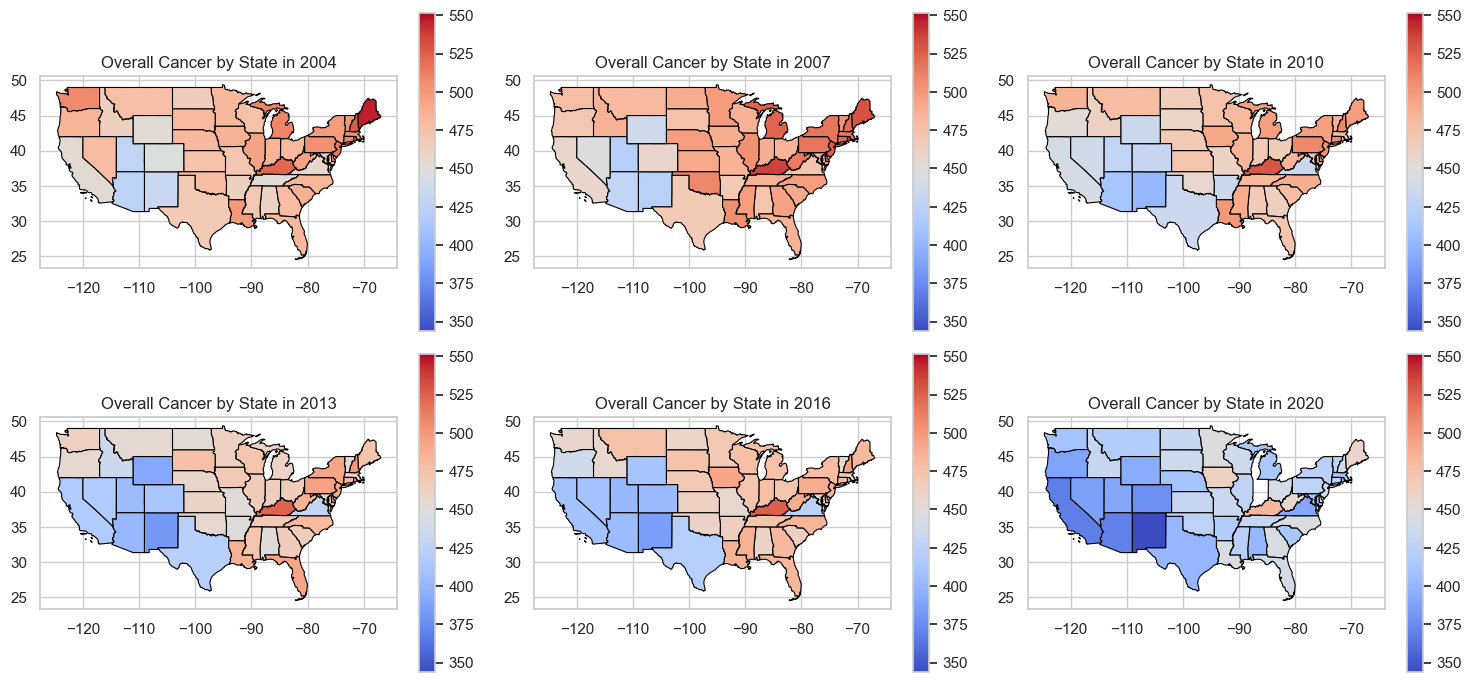

In [385]:
plot_map(df_all, gdf_states, all_min_value, all_max_value, 'RateValue')

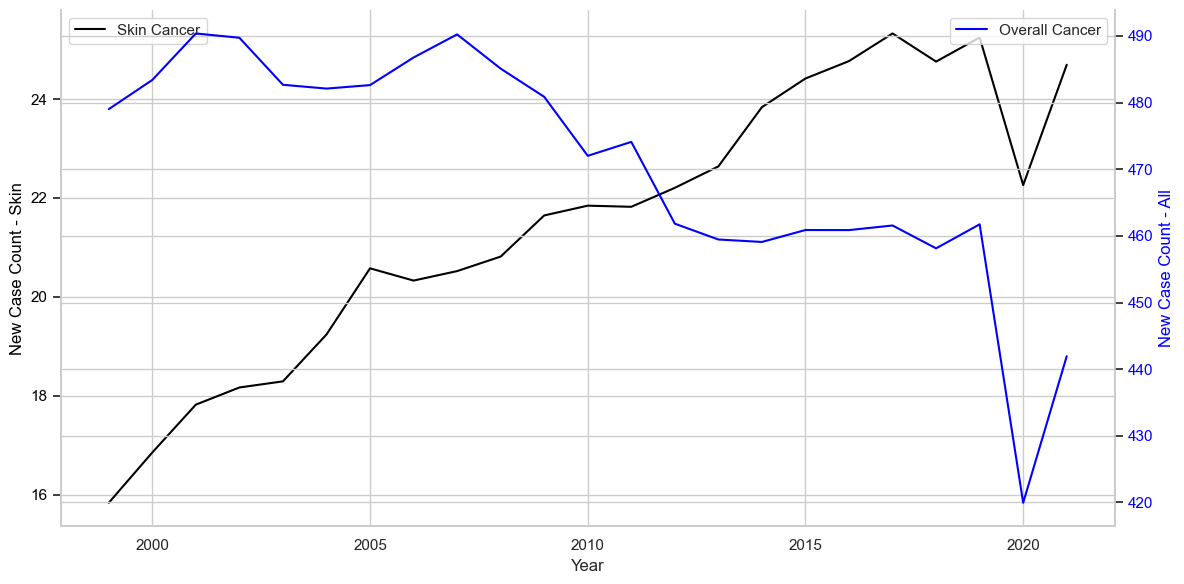

In [386]:

avg_skin_per_year = df_skin.groupby('Year')['RateValue'].mean().reset_index()
avg_all_per_year = df_all.groupby('Year')['RateValue'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x=avg_skin_per_year['Year'], y=avg_skin_per_year['RateValue'], ax=ax1, color='black', linewidth=1.5, label='Skin Cancer')

ax1.set_xlabel('Year')
ax1.set_ylabel('New Case Count - Skin', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

ax2 = ax1.twinx()

sns.lineplot(x=avg_all_per_year['Year'], y=avg_all_per_year['RateValue'], ax=ax2, color='blue', linewidth=1.5, label='Overall Cancer')
ax2.set_ylabel('New Case Count - All', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

sns.despine(fig=fig, right=False)
plt.tight_layout()
plt.show()

In [387]:
df_uv.set_index(['State', 'Year'], inplace=True)
df_skin.set_index(['State', 'Year'], inplace=True)

In [388]:
df1 = df_uv.drop(columns=['StateFIPS', 'Data Comment', 'Unnamed: 5'])
df2 = df_skin.drop(columns=['Cancer Type'])

df_combined = df1.merge(df2, left_index=True, right_index=True, how='inner')
df_combined.head()

Value  RateValue Case Count  Population  \
State   Year                                            
ALABAMA 2004     88       15.4        735   4530729.0   
        2005    146       19.1        919   4565917.0   
        2006    153       18.4        908   4628981.0   
        2007    152       19.4        971   4672840.0   
        2008    155       20.9       1065   4718206.0   

              Average Elevation (feet)  Average Elevation (meters)  
State   Year                                                        
ALABAMA 2004                       500                         152  
        2005                       500                         152  
        2006                       500                         152  
        2007                       500                         152  
        2008                       500                         152

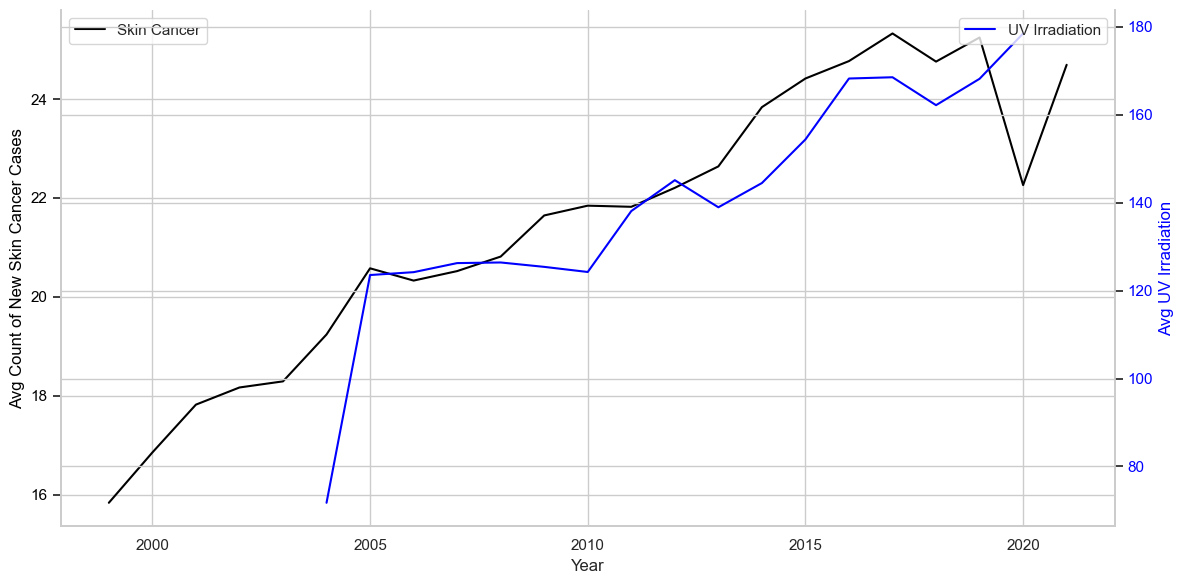

In [389]:

avg_skin_per_year = df_skin.groupby('Year')['RateValue'].mean().reset_index()
avg_uv_per_year = df_uv.groupby('Year')['Value'].mean().reset_index()


fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x=avg_skin_per_year['Year'], y=avg_skin_per_year['RateValue'], ax=ax1, color='black', linewidth=1.5, label='Skin Cancer')

ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Count of New Skin Cancer Cases', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

ax2 = ax1.twinx()

sns.lineplot(x=avg_uv_per_year['Year'], y=avg_uv_per_year['Value'], ax=ax2, color='blue', linewidth=1.5, label='UV Irradiation')
ax2.set_ylabel('Avg UV Irradiation', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

sns.despine(fig=fig, right=False)
plt.tight_layout()
plt.show()

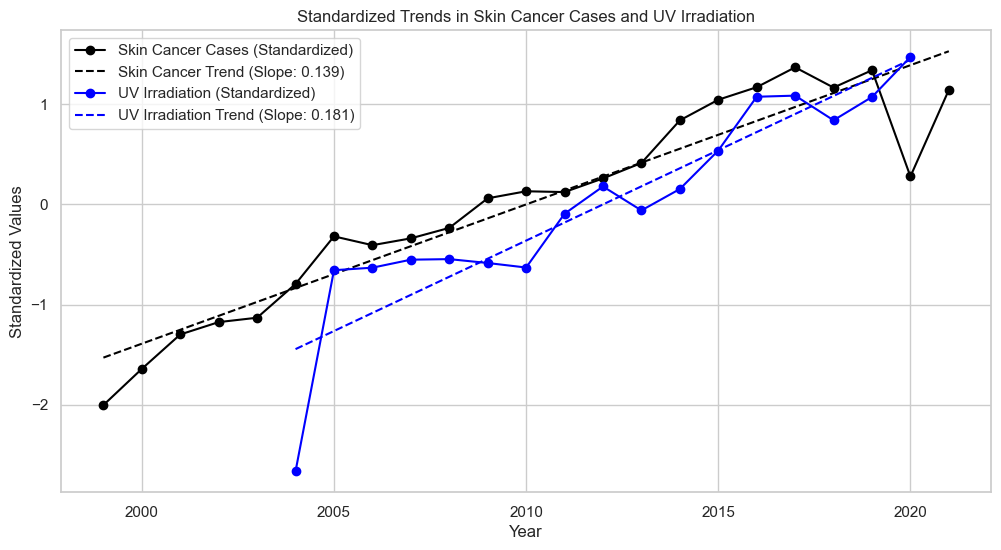

Slope of Skin Cancer Cases trend: 0.139
Slope of UV Irradiation trend: 0.181


In [343]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df_skin and df_uv are your dataframes containing the relevant data
# Calculate average values per year for RateValue (Skin Cancer Cases) and Value (UV Irradiation)
avg_skin_per_year = df_skin.groupby('Year')['RateValue'].mean().reset_index()
avg_uv_per_year = df_uv.groupby('Year')['Value'].mean().reset_index()

# Standardizing the data
avg_skin_per_year['Standardized RateValue'] = (avg_skin_per_year['RateValue'] - avg_skin_per_year['RateValue'].mean()) / avg_skin_per_year['RateValue'].std()
avg_uv_per_year['Standardized Value'] = (avg_uv_per_year['Value'] - avg_uv_per_year['Value'].mean()) / avg_uv_per_year['Value'].std()

# Linear regression for skin cancer cases
X_skin = avg_skin_per_year[['Year']]
y_skin = avg_skin_per_year['Standardized RateValue']
model_skin = LinearRegression()
model_skin.fit(X_skin, y_skin)
y_skin_pred = model_skin.predict(X_skin)

# Linear regression for UV irradiation
X_uv = avg_uv_per_year[['Year']]
y_uv = avg_uv_per_year['Standardized Value']
model_uv = LinearRegression()
model_uv.fit(X_uv, y_uv)
y_uv_pred = model_uv.predict(X_uv)

# Plotting the standardized values and their regression lines
plt.figure(figsize=(12, 6))

# Plot for Skin Cancer Cases
plt.plot(avg_skin_per_year['Year'], y_skin, 'o-', label='Skin Cancer Cases (Standardized)', color='black')
plt.plot(avg_skin_per_year['Year'], y_skin_pred, color='black', linestyle='--', label=f'Skin Cancer Trend (Slope: {model_skin.coef_[0]:.3f})')

# Plot for UV Irradiation
plt.plot(avg_uv_per_year['Year'], y_uv, 'o-', label='UV Irradiation (Standardized)', color='blue')
plt.plot(avg_uv_per_year['Year'], y_uv_pred, color='blue', linestyle='--', label=f'UV Irradiation Trend (Slope: {model_uv.coef_[0]:.3f})')

plt.xlabel('Year')
plt.ylabel('Standardized Values')
plt.title('Standardized Trends in Skin Cancer Cases and UV Irradiation')
plt.legend()
plt.grid(True)
plt.show()

# Print the slopes of the regression lines
print(f'Slope of Skin Cancer Cases trend: {model_skin.coef_[0]:.3f}')
print(f'Slope of UV Irradiation trend: {model_uv.coef_[0]:.3f}')


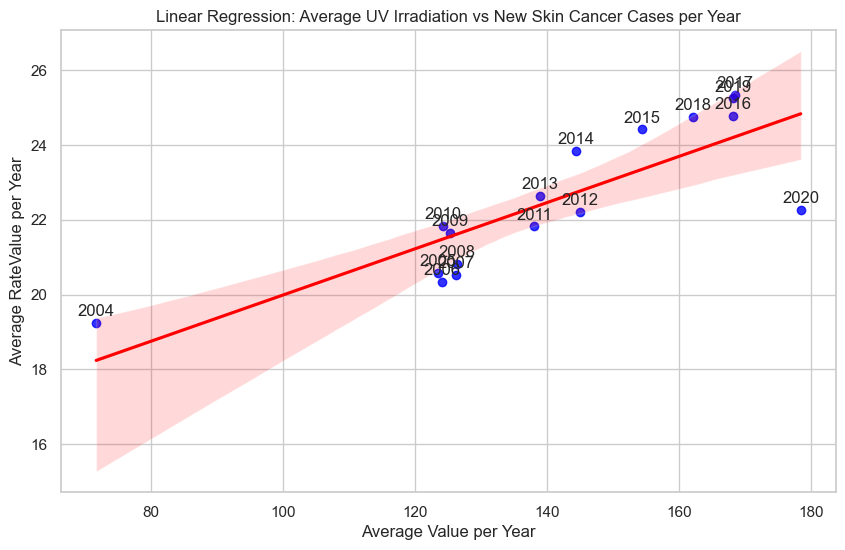

Coefficient: 0.061750097449334296
Intercept: 13.809721182971272


In [395]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

avg_skin_per_year = df_skin.groupby('Year')['RateValue'].mean().reset_index()
avg_uv_per_year = df_uv.groupby('Year')['Value'].mean().reset_index()

# Merge the data on 'Year'
df_combined = pd.merge(avg_skin_per_year, avg_uv_per_year, on='Year')


# Assuming df_combined is your original DataFrame
# Group by year and calculate the average values
df_avg_per_year = df_combined.groupby('Year').mean().reset_index()

# Prepare the data for regression
X = df_avg_per_year[['Value']]  # Independent variable: Average Value per year
y = df_avg_per_year['RateValue']  # Dependent variable: Average RateValue per year

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Value', y='RateValue', data=df_avg_per_year, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Annotate each point with the corresponding year
for i, row in df_avg_per_year.iterrows():
    plt.annotate(int(row['Year']), (row['Value'], row['RateValue']), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Average Value per Year')
plt.ylabel('Average RateValue per Year')
plt.title('Linear Regression: Average UV Irradiation vs New Skin Cancer Cases per Year')
plt.show()

# Coefficient and intercept
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

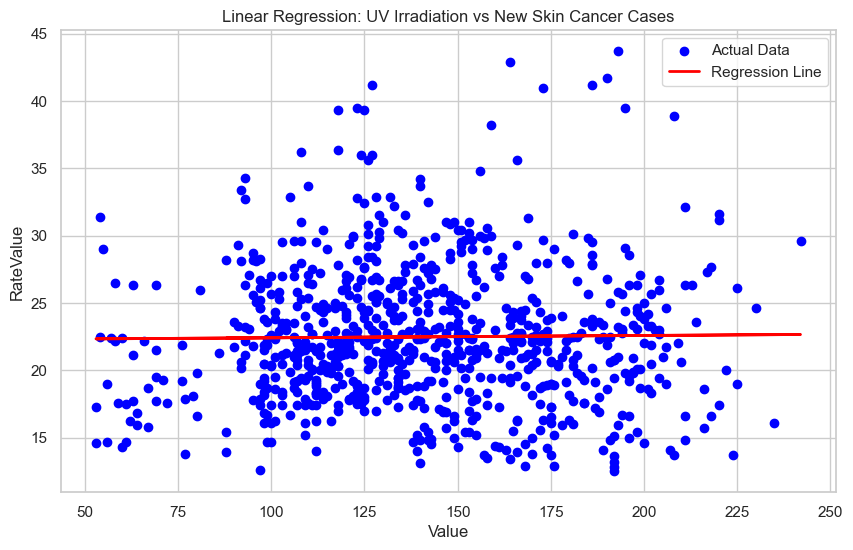

Coefficient: 0.0017114137235598314
Intercept: 22.244069305566697


In [350]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df_combined = df_combined.dropna(subset=['Value', 'RateValue'])

X = df_combined[['Value']]
y = df_combined['RateValue']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Value')
plt.ylabel('RateValue')
plt.title('Linear Regression: UV Irradiation vs New Skin Cancer Cases')
plt.legend()
plt.show()

# Coefficient and intercept
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

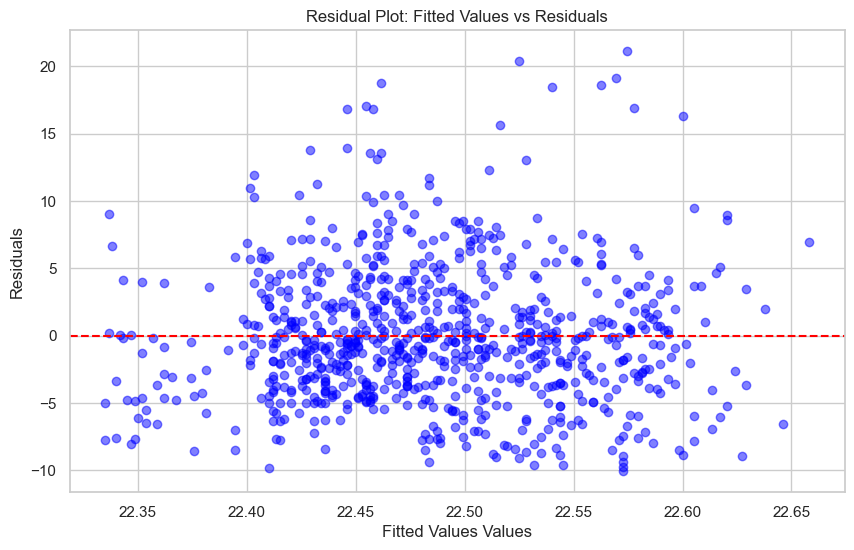

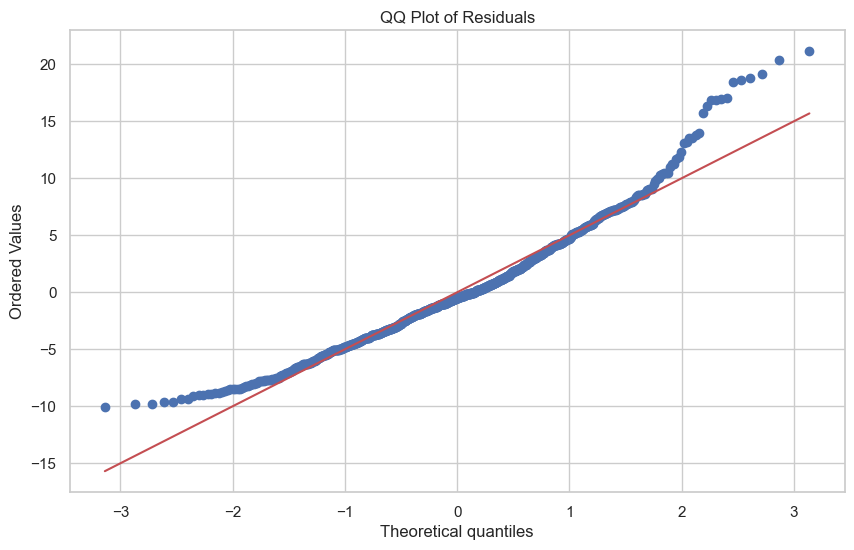

In [390]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

residuals = y - y_pred

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Fitted Values vs Residuals')
plt.show()

# QQ Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()


                            OLS Regression Results                            
Dep. Variable:              RateValue   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     28.92
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           7.69e-05
Time:                        16:27:39   Log-Likelihood:                 28.128
No. Observations:                  17   AIC:                            -52.26
Df Residuals:                      15   BIC:                            -50.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5943      0.290      5.495      0.0

/Users/jiminheo/.pyenv/versions/ml_hw2/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  k, _ = kurtosistest(a, axis)


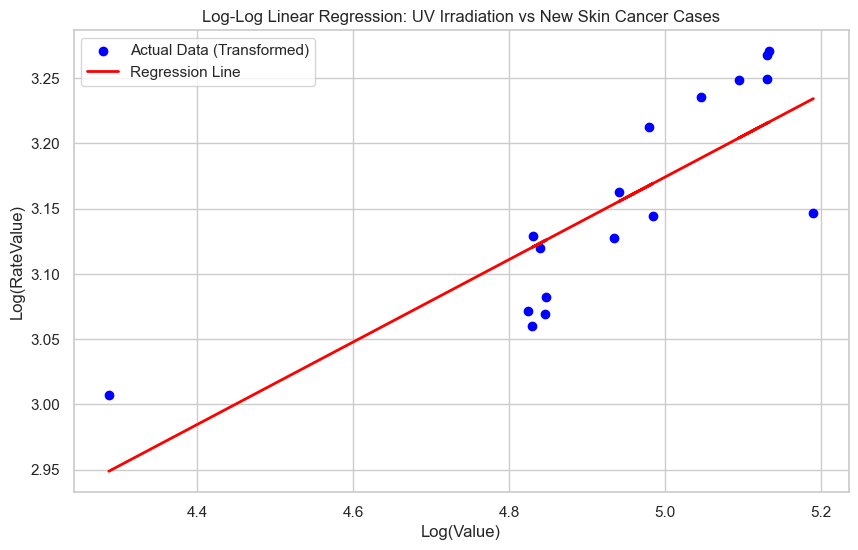

Coefficient: 0.31597395604656187
Intercept: 1.5943382266048927


In [397]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Drop rows with NaN values in 'Value' or 'RateValue'
df_combined = df_combined.dropna(subset=['Value', 'RateValue'])

# Apply a logarithmic transformation to both 'Value' and 'RateValue'
# Adding a small constant (1) to avoid log(0) issues
X = np.log(df_combined[['Value']] + 1)
y = np.log(df_combined['RateValue'] + 1)

# Fit the linear regression model with the transformed data
model = LinearRegression()
model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

X_with_const = sm.add_constant(X)  # Adding a constant for the intercept
model_sm = sm.OLS(y, X_with_const).fit()

# Print the model summary with significance tests
print(model_sm.summary())

# Plot the transformed data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data (Transformed)')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Log(Value)')
plt.ylabel('Log(RateValue)')
plt.title('Log-Log Linear Regression: UV Irradiation vs New Skin Cancer Cases')
plt.legend()
plt.show()

# Coefficient and intercept of the transformed model
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     28.92
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           7.69e-05
Time:                        16:38:01   Log-Likelihood:                -14.990
No. Observations:                  17   AIC:                             33.98
Df Residuals:                      15   BIC:                             35.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.996e-15      0.151  -2.65e-14      1.0

/Users/jiminheo/.pyenv/versions/ml_hw2/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  k, _ = kurtosistest(a, axis)


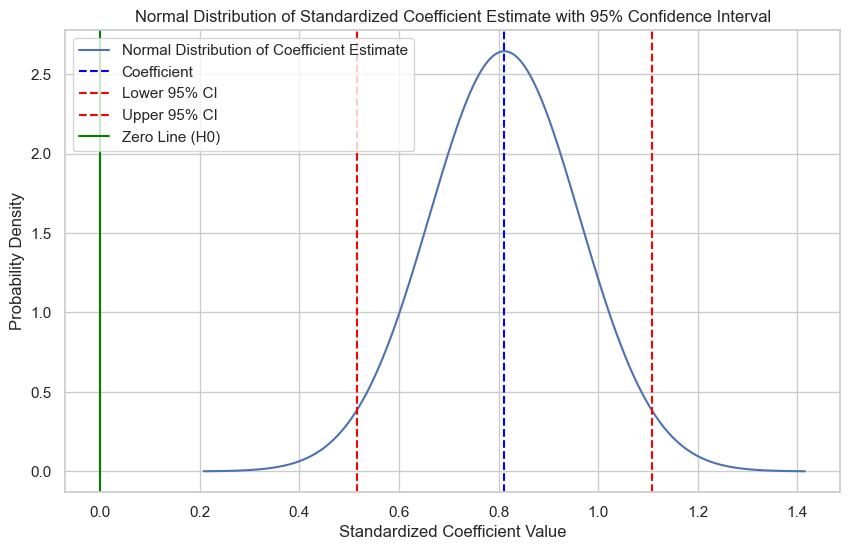

In [400]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Assuming df_combined is your DataFrame with 'Value' and 'RateValue'

# Drop rows with NaN values
df_combined = df_combined.dropna(subset=['Value', 'RateValue'])

# Log transformation and then standardization
X_log = np.log(df_combined[['Value']] + 1)
y_log = np.log(df_combined['RateValue'] + 1)

# Standardizing the variables
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_log)
y_standardized = scaler.fit_transform(y_log.values.reshape(-1, 1))

# Adding constant for the intercept term
X_standardized_const = sm.add_constant(X_standardized)

# Fit the model using statsmodels
model_sm_standardized = sm.OLS(y_standardized, X_standardized_const).fit()

# Print the model summary with significance tests
print(model_sm_standardized.summary())

# Extract the standardized coefficient and its standard error
coef_std = model_sm_standardized.params[1]  # Coefficient for the standardized 'Value'
std_err_std = model_sm_standardized.bse[1]  # Standard error for the coefficient

# Mean and standard deviation for the normal distribution
mean = coef_std
std_dev = std_err_std

# Generate values for the normal distribution
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution of the standardized coefficient
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution of Coefficient Estimate')
plt.axvline(x=mean, color='blue', linestyle='--', label='Coefficient')
plt.axvline(x=mean - 1.96*std_dev, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=mean + 1.96*std_dev, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=0, color='green', linestyle='-', label='Zero Line (H0)')
plt.xlabel('Standardized Coefficient Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Standardized Coefficient Estimate with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()




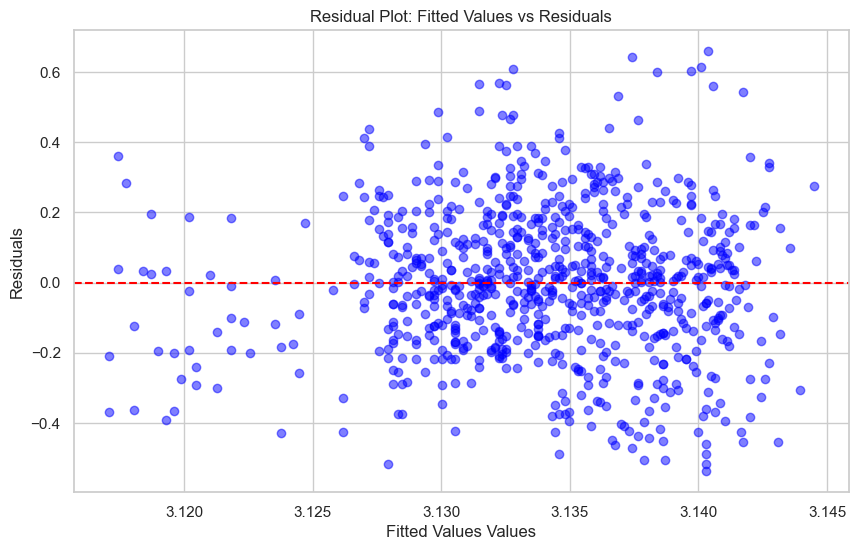

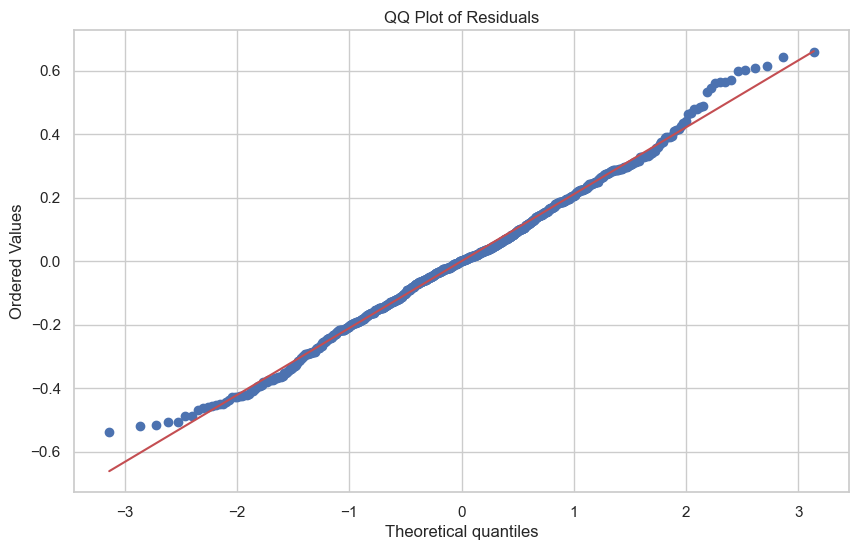

In [392]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

residuals = y - y_pred

# QQ Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

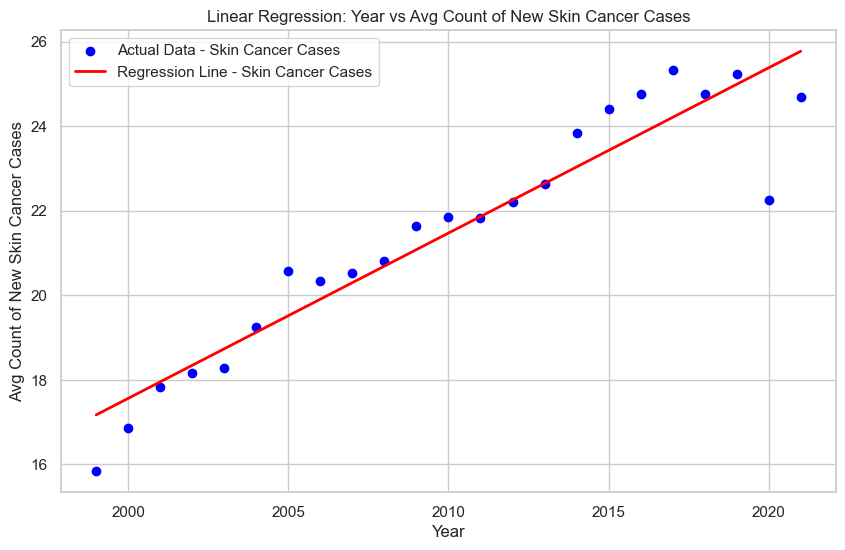

Skin Cancer Cases Regression:
Coefficient: 0.39117807059961296
Intercept: -764.7940785771174



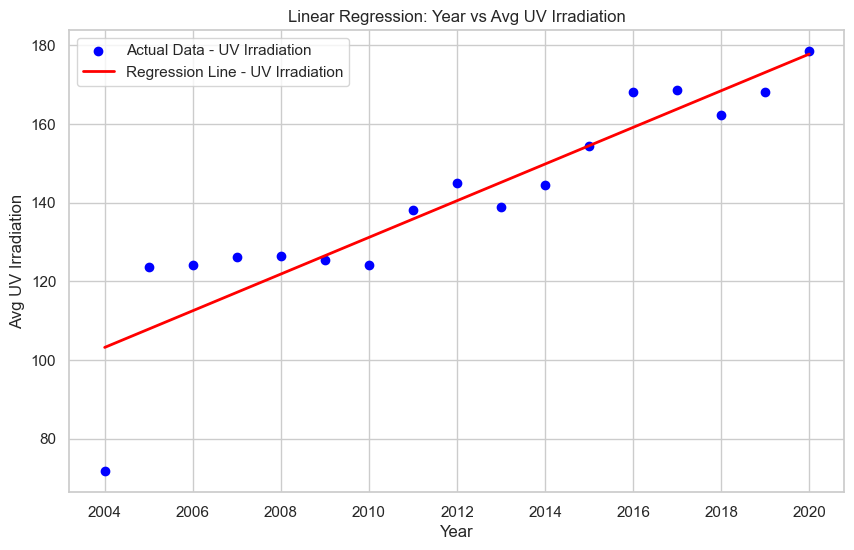

UV Irradiation Regression:
Coefficient: 4.659563825530213
Intercept: -9234.562224889958


In [345]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with actual data)
# Assuming df_skin and df_uv are your dataframes containing the relevant data

# Calculate average values per year
avg_skin_per_year = df_skin.groupby('Year')['RateValue'].mean().reset_index()
avg_uv_per_year = df_uv.groupby('Year')['Value'].mean().reset_index()

# Prepare data for regression: Year vs RateValue
X_skin = avg_skin_per_year[['Year']]
y_skin = avg_skin_per_year['RateValue']

# Linear regression for Year vs RateValue (Skin Cancer Cases)
model_skin = LinearRegression()
model_skin.fit(X_skin, y_skin)
y_skin_pred = model_skin.predict(X_skin)

# Plotting Skin Cancer Cases over Years
plt.figure(figsize=(10, 6))
plt.scatter(X_skin, y_skin, color='blue', label='Actual Data - Skin Cancer Cases')
plt.plot(X_skin, y_skin_pred, color='red', linewidth=2, label='Regression Line - Skin Cancer Cases')
plt.xlabel('Year')
plt.ylabel('Avg Count of New Skin Cancer Cases')
plt.title('Linear Regression: Year vs Avg Count of New Skin Cancer Cases')
plt.legend()
plt.show()

print('Skin Cancer Cases Regression:')
print(f'Coefficient: {model_skin.coef_[0]}')
print(f'Intercept: {model_skin.intercept_}\n')

# Prepare data for regression: Year vs Value (UV Irradiation)
X_uv = avg_uv_per_year[['Year']]
y_uv = avg_uv_per_year['Value']

# Linear regression for Year vs Value (UV Irradiation)
model_uv = LinearRegression()
model_uv.fit(X_uv, y_uv)
y_uv_pred = model_uv.predict(X_uv)

# Plotting UV Irradiation over Years
plt.figure(figsize=(10, 6))
plt.scatter(X_uv, y_uv, color='blue', label='Actual Data - UV Irradiation')
plt.plot(X_uv, y_uv_pred, color='red', linewidth=2, label='Regression Line - UV Irradiation')
plt.xlabel('Year')
plt.ylabel('Avg UV Irradiation')
plt.title('Linear Regression: Year vs Avg UV Irradiation')
plt.legend()
plt.show()

print('UV Irradiation Regression:')
print(f'Coefficient: {model_uv.coef_[0]}')
print(f'Intercept: {model_uv.intercept_}')


In [262]:
df_combined2 = df_combined.reset_index()
df_combined2.head()

df_combined2['AverageRateValue'] = df_combined2.groupby('State')['RateValue'].transform('mean')
df_combined2['AverageValue'] = df_combined2.groupby('State')['Value'].transform('mean')
df_combined2.head()

df_asdf = df_combined2.drop_duplicates(subset=['State'])
df_asdf = df_asdf[['State', 'Average Elevation (feet)', 'AverageRateValue', 'AverageValue']]
df_asdf.head()

,State,Average Elevation (feet),AverageRateValue,AverageValue
0,ALABAMA,500,20.564706,168.000000
17,ARIZONA,4100,22.017647,193.470588
34,ARKANSAS,650,18.305882,157.647059
51,CALIFORNIA,2900,21.805882,169.352941
68,COLORADO,6800,22.100000,174.000000


In [265]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
# Adding an interaction term (AverageValue * Average Elevation (feet))
df_asdf['Interaction'] = df_asdf['AverageValue'] * df_asdf['Average Elevation (feet)']

# Defining the independent variables and dependent variable
X = df_asdf[['AverageValue', 'Average Elevation (feet)', 'Interaction']]
y = df_asdf['AverageRateValue']

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Displaying the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       AverageRateValue   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     3.412
Date:                Sun, 28 Jul 2024   Prob (F-statistic):             0.0255
Time:                        17:09:45   Log-Likelihood:                -130.75
No. Observations:                  48   AIC:                             269.5
Df Residuals:                      44   BIC:                             277.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [274]:
df_asdf = df_combined
df_asdf.head()

# Adding an interaction term (AverageValue * Average Elevation (feet))
df_asdf['Interaction'] = df_asdf['Value'] * df_asdf['Average Elevation (feet)']

# Defining the independent variables and dependent variable
X = df_asdf[['Value', 'Average Elevation (feet)', 'Interaction']]
y = df_asdf['RateValue']

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Displaying the regression results
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:              RateValue   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.276
Date:                Sun, 28 Jul 2024   Prob (F-statistic):            0.00524
Time:                        17:12:32   Log-Likelihood:                -2473.6
No. Observations:                 815   AIC:                             4955.
Df Residuals:                     811   BIC:                             4974.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

ALABAMA - Coefficients: [0.04667148 0.        ], Intercept: 12.723897412670553
ARIZONA - Coefficients: [0.15080398 0.        ], Intercept: -7.15848779629291
ARKANSAS - Coefficients: [0.10623556 0.        ], Intercept: 1.5581580118756655
CALIFORNIA - Coefficients: [0.02550114 0.        ], Intercept: 17.487189402441924
COLORADO - Coefficients: [0.00210259 0.        ], Intercept: 21.73414852371011
CONNECTICUT - Coefficients: [-0.07627251  0.        ], Intercept: 30.47672387306325
DELAWARE - Coefficients: [0.03372634 0.        ], Intercept: 23.691699674695343
FLORIDA - Coefficients: [0.09092646 0.        ], Intercept: 5.793982808022932
GEORGIA - Coefficients: [0.05726111 0.        ], Intercept: 14.527851307112906
IDAHO - Coefficients: [0.07591141 0.        ], Intercept: 17.057067720361495
ILLINOIS - Coefficients: [0.08361809 0.        ], Intercept: 8.027017380647814
INDIANA - Coefficients: [0.07214654 0.        ], Intercept: 10.466670127928225
IOWA - Coefficients: [0.15217096 0.        ], 

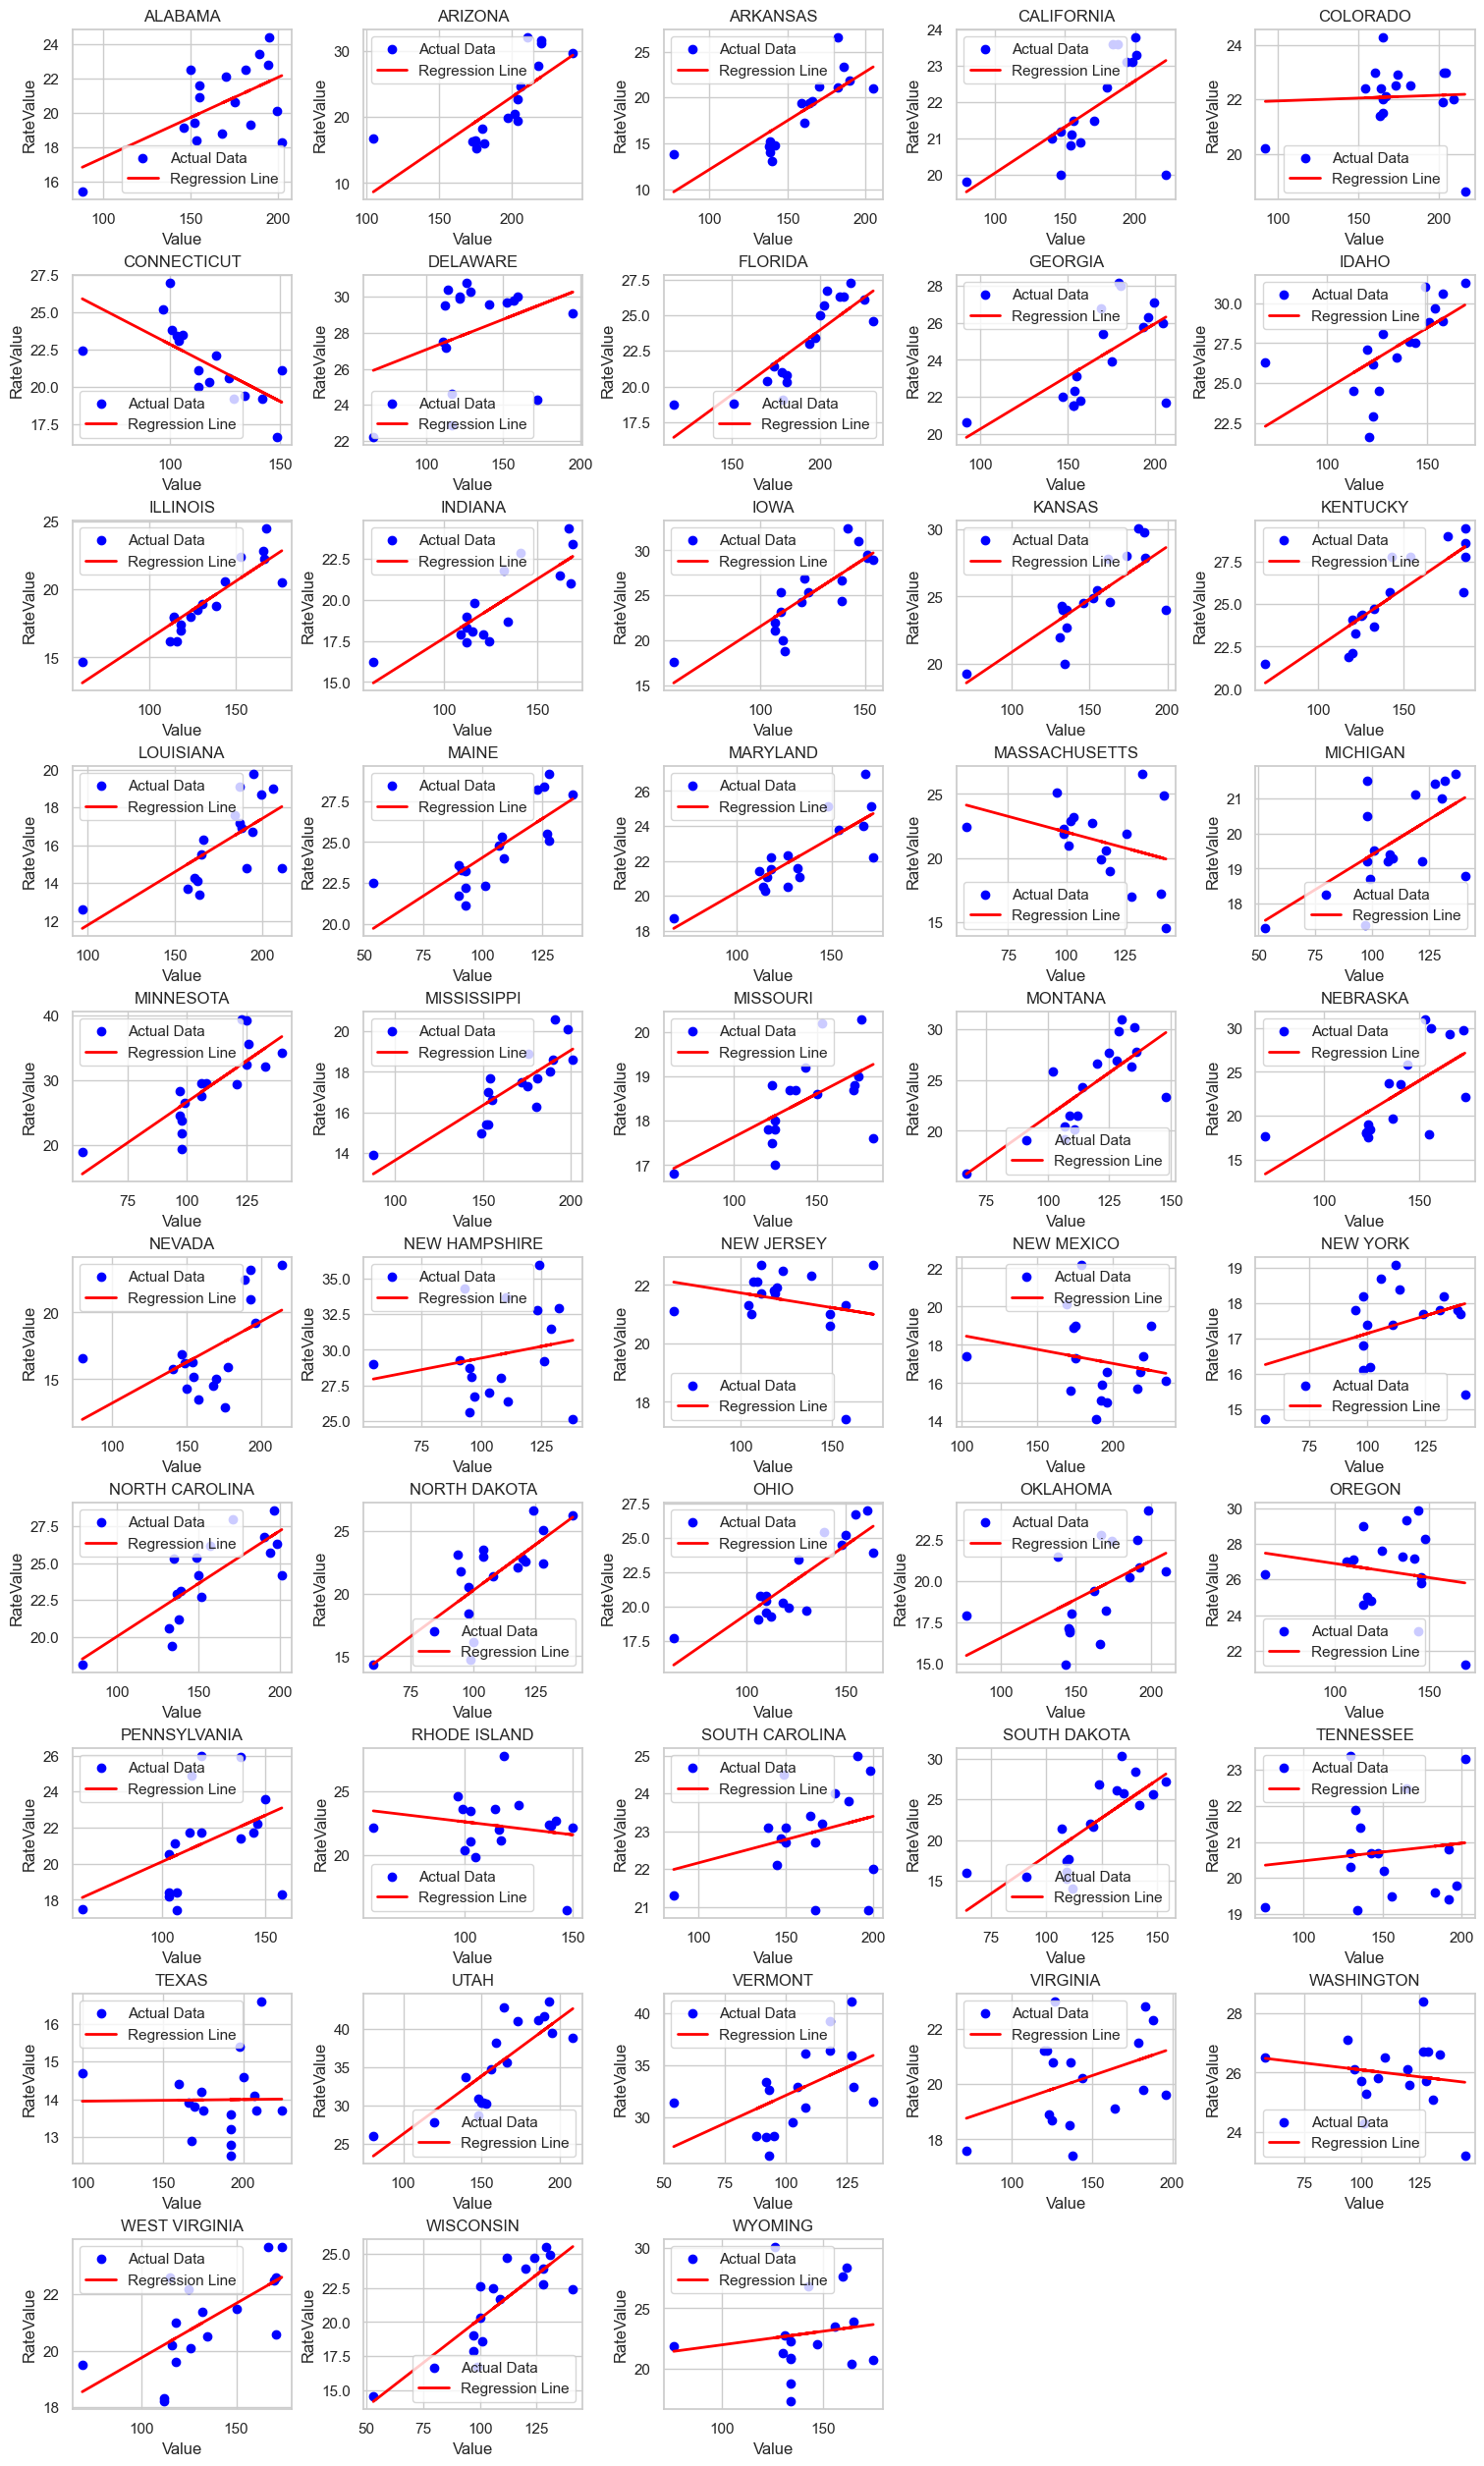

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assume df_combined is your dataframe with a multi-index of ['State', 'Year']
# Ensure df_combined does not have NaN values in 'Value' or 'RateValue'
df_combined = df_combined.dropna(subset=['Value', 'RateValue'])

# Get unique states
states = df_combined.index.get_level_values('State').unique()

# Number of columns and rows for the subplot grid
n_cols = 5
n_rows = (len(states) + n_cols - 1) // n_cols  # Ceiling division to determine number of rows

# Plotting setup
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 2.5), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate over each state and plot the data and regression line
for i, state in enumerate(states):
    state_data = df_combined.loc[state]
    X = state_data[['Value', 'Average Elevation (feet)']]
    y = state_data['RateValue']
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict values
    y_pred = model.predict(X)
    
    # Scatter plot and regression line
    axes[i].scatter(state_data['Value'], y, color='blue', label='Actual Data')
    axes[i].plot(state_data['Value'], y_pred, color='red', linewidth=2, label='Regression Line')
    axes[i].set_title(f'{state}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('RateValue')
    axes[i].legend()
    
    # Print Coefficient and Intercept for each state
    print(f'{state} - Coefficients: {model.coef_}, Intercept: {model.intercept_}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


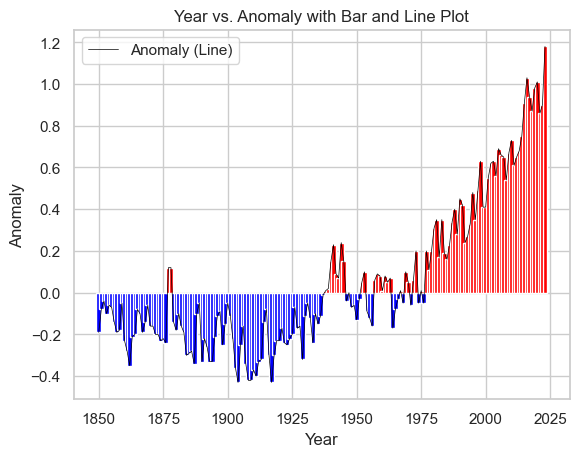

In [354]:
# Load the data
dataFrame = pd.read_csv("./data/world_temperature_data.csv")
dataFrame.head()

colors = dataFrame['Anomaly'].apply(lambda x: 'red' if x > 0 else 'blue')

plt.bar(dataFrame['Year'], dataFrame['Anomaly'], color=colors, width=1.8)  # Increase the width for thicker bars
plt.plot(dataFrame['Year'], dataFrame['Anomaly'], color='black', linewidth=0.5, label='Anomaly (Line)')  # Thinner line

plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title('Year vs. Anomaly with Bar and Line Plot')
plt.legend()

plt.show()
